In [3]:
#imports
import os
from collections import Counter
import pickle

import numpy as np

import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import Input, Model, layers, losses, optimizers, callbacks
from tensorflow.keras.datasets import mnist

from matplotlib import pyplot as plt

2022-10-27 18:20:10.071270: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-27 18:20:10.387054: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-27 18:20:10.387109: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-27 18:20:10.442449: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-27 18:20:11.589337: W tensorflow/stream_executor/platform/de

11490434/11490434 [==============================] - 2s 0us/step
(10000, 784)
Counter({1: 1140, 7: 1062, 3: 1031, 9: 1002, 6: 999, 2: 982, 0: 970, 8: 949, 4: 949, 5: 916})


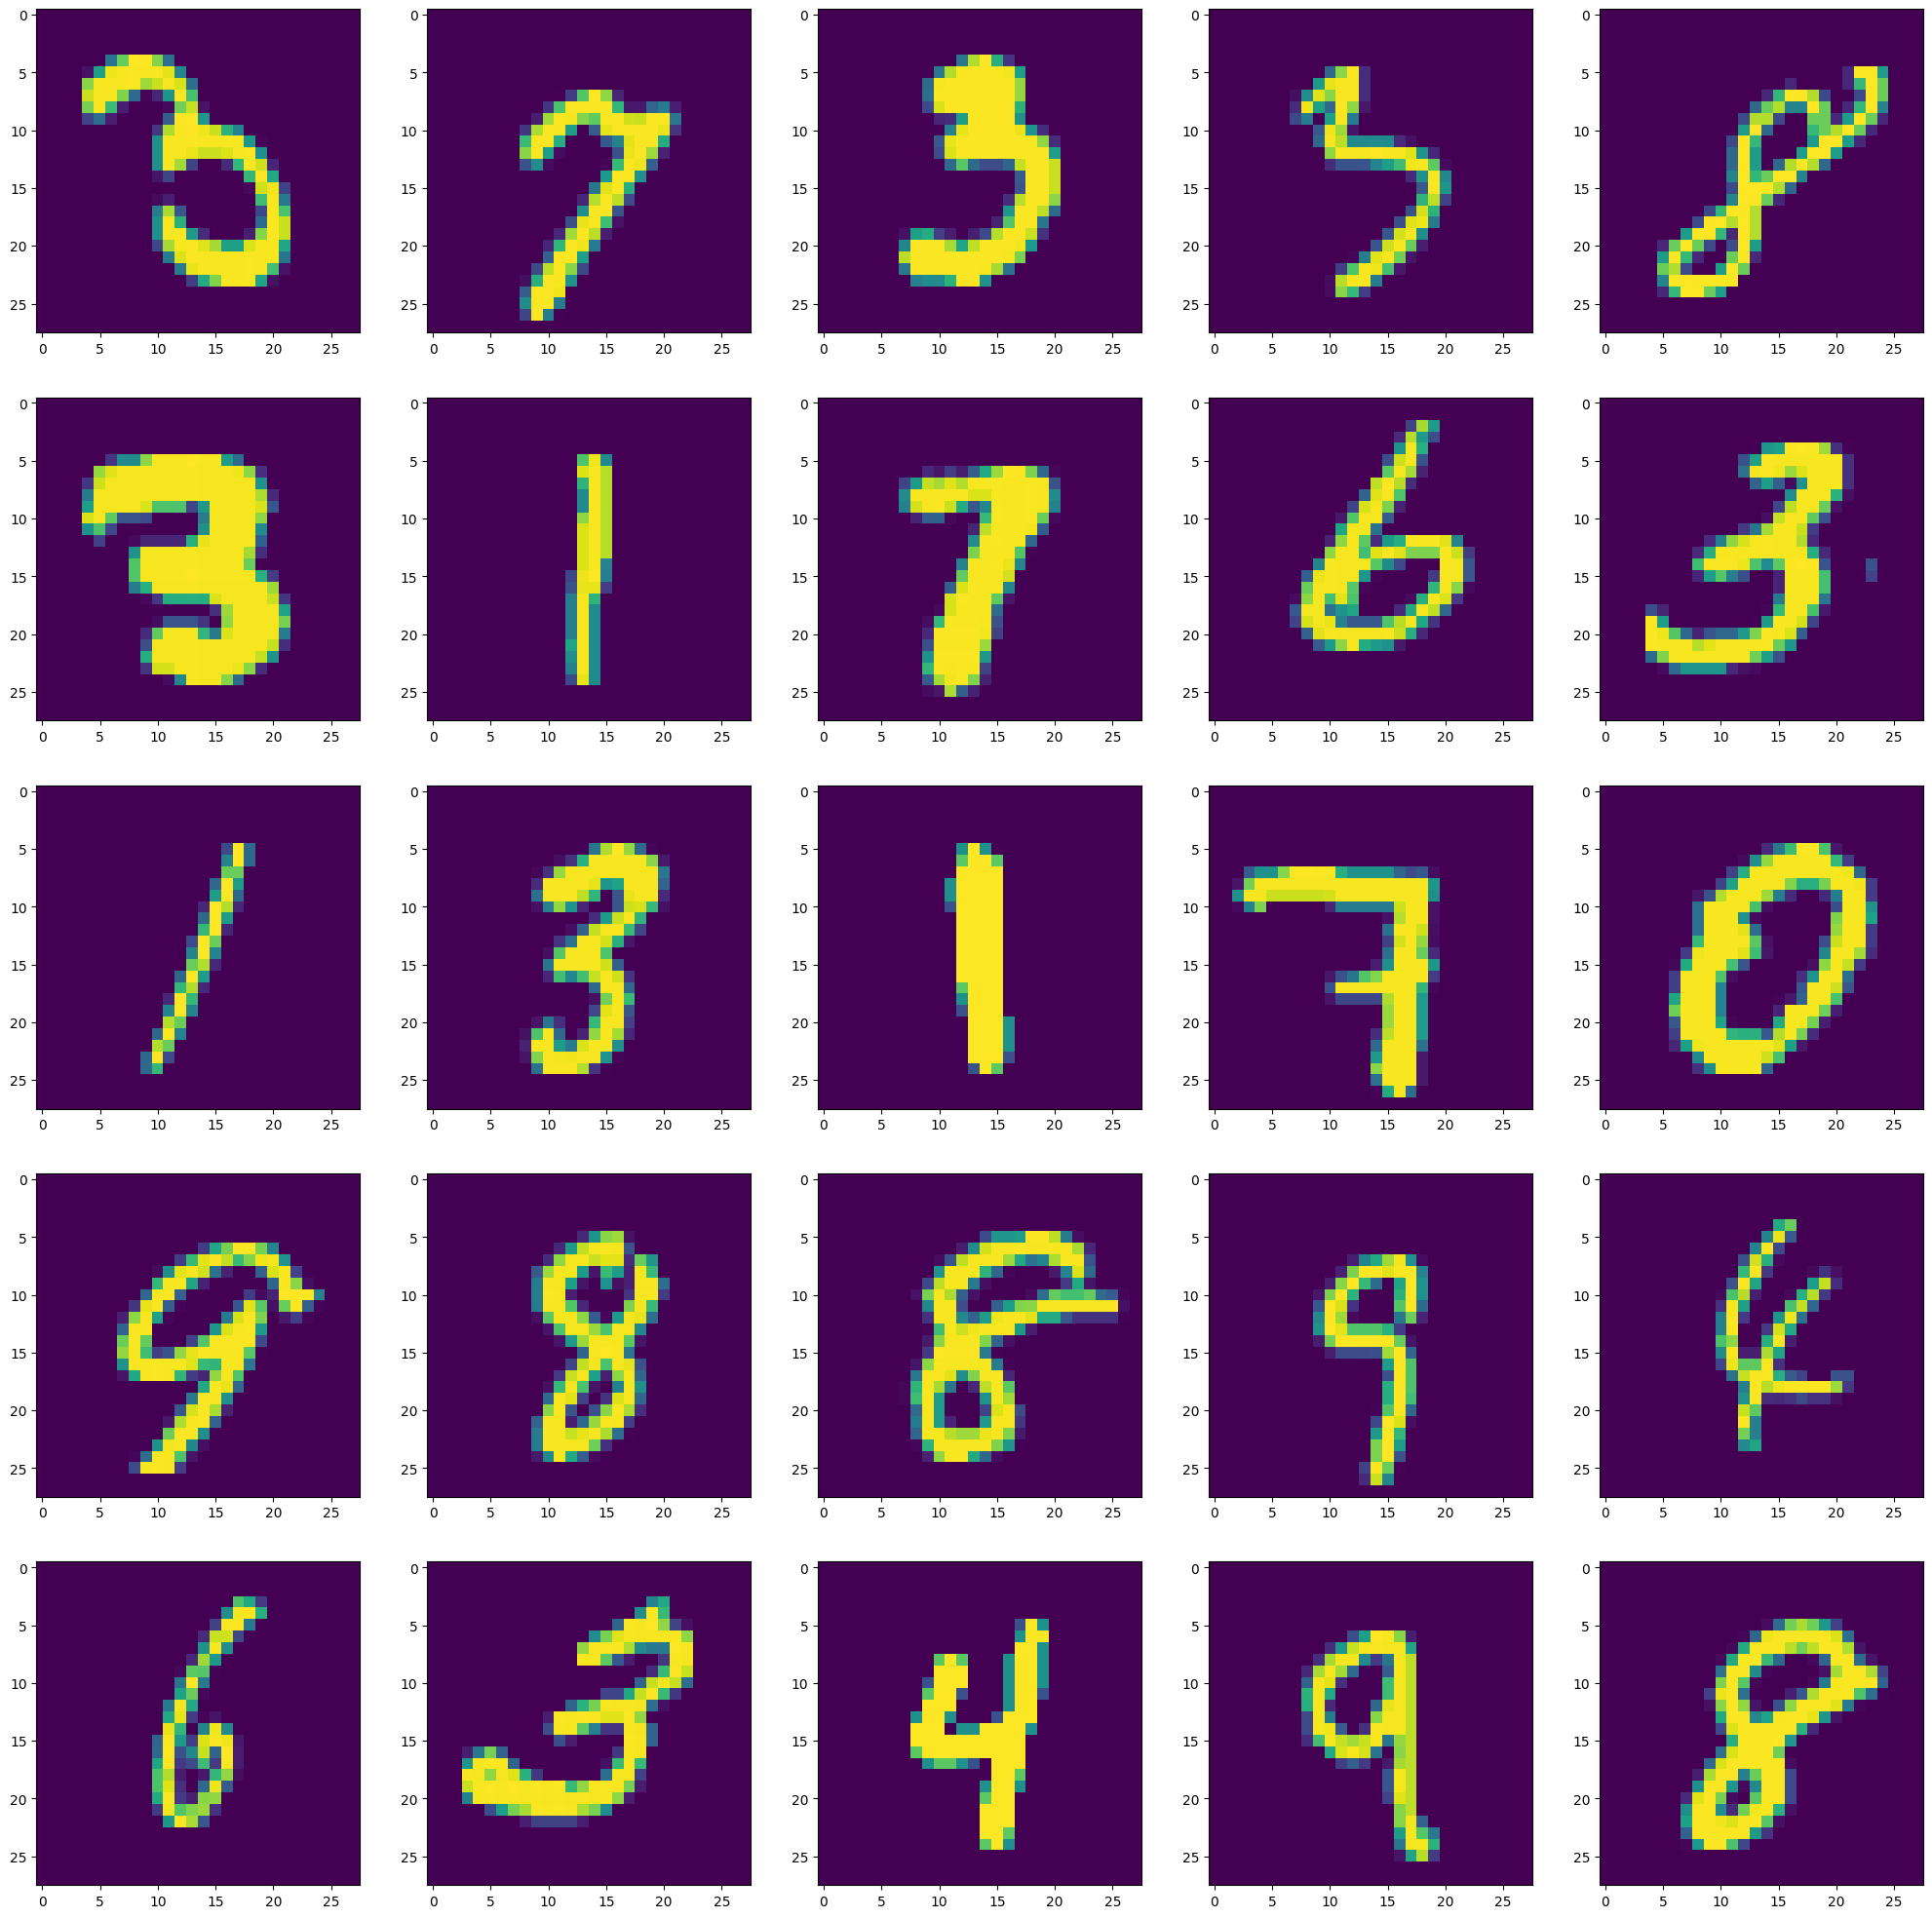

In [4]:
#load data
(xtrain_, ytrain), (xtest, ytest) = mnist.load_data()

# preprocessing: rescaling, reshaping
def preprocess_images(x):
    return x.astype('float32')/255.

xtrain = preprocess_images(xtrain_)

# Split some data for training/validation/testing
Xtrain_, Xrest_, Ytrain, Yrest_ = train_test_split(xtrain, ytrain, train_size=10000)
Xval_, Xrest_, Yval, Yrest_ = train_test_split(Xrest_, Yrest_, train_size=1000)
Xtest_, Xrest_, Ytest, Yrest_ = train_test_split(Xrest_, Yrest_, train_size=10000)

# plot some samples
idxs = np.random.choice(len(Xtrain_), 25, replace=False)
fig, axs = plt.subplots(5,5,figsize=(25,25))
for idx, ax in zip(idxs, axs.flatten()):
    ax.imshow(Xtrain_[idx])

#sklearn needs the format n_samples x n_feature
Xtrain = Xtrain_.reshape((Xtrain_.shape[0], -1))
Xtest = Xtest_.reshape((Xtest_.shape[0], -1))
print(Xtrain.shape)
print(Counter(Ytrain))

In [5]:
# train a classifier
LR = LogisticRegression(max_iter=1000)
LR.fit(Xtrain, Ytrain)


LogisticRegression(max_iter=1000)

In [6]:
# evaluate trained classifier on test set
Ypred = LR.predict(Xtest)
print(classification_report(Ytest, Ypred))
print(confusion_matrix(Ytest, Ypred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1032
           1       0.94      0.96      0.95      1081
           2       0.88      0.86      0.87       995
           3       0.88      0.87      0.87       983
           4       0.91      0.91      0.91       998
           5       0.84      0.85      0.85       913
           6       0.91      0.95      0.93       997
           7       0.92      0.92      0.92      1056
           8       0.88      0.82      0.85       948
           9       0.87      0.87      0.87       997

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

[[ 986    0    8    2    1   12   10    4    5    4]
 [   0 1043    8    4    3    2    1    4   14    2]
 [  10   18  857   25   12    6   23   17   20    7]
 [   5    7   23  854    1   48    3    7   14   21]
 [   5    3   10    1  904   

In [7]:
# try a better model
RF = RandomForestClassifier()
RF.fit(Xtrain, Ytrain)

RandomForestClassifier()

In [8]:
# evaluate trained classifier on test set
Ypred2 = RF.predict(Xtest)
print(classification_report(Ytest, Ypred2))
print(confusion_matrix(Ytest, Ypred2))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1032
           1       0.97      0.98      0.98      1081
           2       0.95      0.94      0.94       995
           3       0.94      0.92      0.93       983
           4       0.93      0.94      0.94       998
           5       0.92      0.95      0.93       913
           6       0.96      0.97      0.96       997
           7       0.96      0.95      0.96      1056
           8       0.94      0.91      0.92       948
           9       0.92      0.92      0.92       997

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

[[1009    0    1    2    1    4    5    0    7    3]
 [   0 1064    6    4    1    0    1    2    3    0]
 [   6    4  936    5   13    1    7    6   11    6]
 [   2    1    9  901    2   36    0   11   11   10]
 [   2    1    1    0  939   

In [9]:
# Hyperparameter tuning
param_grid = {
    'n_estimators' : [200, 500],
    'max_depth' : [None, 10, 50],
    'max_features' : ['sqrt', 'log2', .1]
}

RF_tuned = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=4, n_jobs=-1, verbose=4)
RF_tuned.fit(Xtrain, Ytrain)

Fitting 4 folds for each of 18 candidates, totalling 72 fits
[CV 3/4] END max_depth=None, max_features=sqrt, n_estimators=200;, score=0.944 total time=  16.1s
[CV 1/4] END max_depth=None, max_features=sqrt, n_estimators=500;, score=0.957 total time=  49.1s
[CV 4/4] END max_depth=None, max_features=log2, n_estimators=200;, score=0.942 total time=   7.2s
[CV 4/4] END max_depth=None, max_features=log2, n_estimators=500;, score=0.946 total time=  17.6s
[CV 4/4] END max_depth=None, max_features=0.1, n_estimators=200;, score=0.941 total time=  49.7s
[CV 4/4] END max_depth=None, max_features=0.1, n_estimators=500;, score=0.942 total time= 1.8min
[CV 3/4] END max_depth=10, max_features=sqrt, n_estimators=200;, score=0.933 total time=  11.7s
[CV 2/4] END max_depth=10, max_features=sqrt, n_estimators=500;, score=0.943 total time=  29.1s
[CV 3/4] END max_depth=10, max_features=log2, n_estimators=200;, score=0.924 total time=   5.9s
[CV 2/4] END max_depth=10, max_features=log2, n_estimators=500;, 

KeyboardInterrupt: 

In [8]:
# display crossvalidation results
cv_results = pd.DataFrame(RF_tuned.cv_results_)
disp_cols = ['param_n_estimators','param_max_depth', 'param_max_features', 'mean_fit_time', 'mean_test_score']
mapper = dict(zip(disp_cols[:3], ['n_estimators', 'max_depth', 'max_features']))
renamed_df = cv_results[disp_cols].copy()
renamed_df.rename(columns=mapper, inplace=True)
print(renamed_df.sort_values('mean_test_score', ascending=False))

   n_estimators max_depth max_features  mean_fit_time  mean_test_score
1           500      None         sqrt      27.517305           0.9487
3           500      None         log2      12.653463           0.9487
13          500        50         sqrt      25.956195           0.9484
5           500      None          0.1      58.348672           0.9478
0           200      None         sqrt      11.306649           0.9476
12          200        50         sqrt      11.622646           0.9476
15          500        50         log2      12.460339           0.9475
2           200      None         log2       5.115498           0.9473
14          200        50         log2       5.334117           0.9470
4           200      None          0.1      25.707240           0.9468
17          500        50          0.1      39.129763           0.9466
16          200        50          0.1      20.714308           0.9461
7           500        10         sqrt      24.630440           0.9376
11    

In [9]:
# evaluate trained classifier on test set
print(RF_tuned.best_params_)
Ypred3 = RF_tuned.predict(Xtest)
print(classification_report(Ytest, Ypred3))
print(confusion_matrix(Ytest, Ypred3))

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       988
           1       0.97      0.98      0.98      1087
           2       0.93      0.95      0.94      1006
           3       0.95      0.92      0.93      1048
           4       0.95      0.96      0.96       998
           5       0.95      0.93      0.94       907
           6       0.95      0.97      0.96       993
           7       0.96      0.95      0.96      1081
           8       0.94      0.92      0.93       935
           9       0.93      0.92      0.93       957

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

[[ 961    1    2    0    1    2   10    0   10    1]
 [   1 1070    7    3    2    2    1    0    1    0]
 [  11    1  959    4    6    0    6   13    6    0]
 [   5    4   24 

In [18]:
#Convolutional Neural Network in tensorflow using keras API

def mnist_clf(input_shape=(28,28,1), n_classes=10):
    inx = Input(input_shape)
    x = layers.Conv2D(32, kernel_size=(3, 3), strides=2, padding='same', activation='relu')(inx)
    x = layers.Conv2D(64, kernel_size=(3, 3), strides=2, padding='same', activation='relu')(x)
    x = layers.Conv2D(128, kernel_size=(3, 3), strides=2, padding='same', activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(n_classes)(x)
    return Model(inx, x)

clf_mnist = mnist_clf()
clf_mnist.summary()

# select loss function and optimizer
loss = losses.CategoricalCrossentropy(from_logits=True)
opt = optimizers.Nadam(learning_rate=1e-2)
clf_mnist.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

# preprocess data: scaling of images, one-hot encoding of labels
def preprocess_tf(x, y):
    return x, tf.one_hot(y, depth=10, axis=-1)

trainset = tf.data.Dataset.from_tensor_slices((Xtrain_, Ytrain)).shuffle(Xtrain_.shape[0]).batch(256).map(preprocess_tf)
valset = tf.data.Dataset.from_tensor_slices((Xval_, Yval)).batch(1000).map(preprocess_tf)

# callback for saving model
MdlCpt = callbacks.ModelCheckpoint('cpt/convnet_mnist', save_best_only=True)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290

In [19]:
hist = clf_mnist.fit(trainset, validation_data=valset, epochs=100, callbacks=[MdlCpt])

Epoch 1/100
40/40 [==============================] - 1s 11ms/step - loss: 0.8377 - accuracy: 0.7460 - val_loss: 0.3241 - val_accuracy: 0.9080
INFO:tensorflow:Assets written to: cpt/convnet_mnist/assets
Epoch 2/100
40/40 [==============================] - 0s 10ms/step - loss: 0.1519 - accuracy: 0.9546 - val_loss: 0.2033 - val_accuracy: 0.9500
INFO:tensorflow:Assets written to: cpt/convnet_mnist/assets
Epoch 3/100
40/40 [==============================] - 0s 9ms/step - loss: 0.0833 - accuracy: 0.9757 - val_loss: 0.1657 - val_accuracy: 0.9610
INFO:tensorflow:Assets written to: cpt/convnet_mnist/assets
Epoch 4/100
40/40 [==============================] - 0s 9ms/step - loss: 0.0527 - accuracy: 0.9855 - val_loss: 0.1623 - val_accuracy: 0.9600
INFO:tensorflow:Assets written to: cpt/convnet_mnist/assets
Epoch 5/100
40/40 [==============================] - 0s 9ms/step - loss: 0.0508 - accuracy: 0.9830 - val_loss: 0.1391 - val_accuracy: 0.9720
INFO:tensorflow:Assets written to: cpt/convnet_mnist/

Metrics on test set
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       988
           1       0.98      0.99      0.99      1087
           2       0.97      0.97      0.97      1006
           3       0.97      0.96      0.97      1048
           4       0.96      0.97      0.97       998
           5       0.98      0.95      0.96       907
           6       0.97      0.98      0.97       993
           7       0.98      0.97      0.98      1081
           8       0.94      0.95      0.94       935
           9       0.96      0.95      0.96       957

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

[[ 968    1    4    0    0    0    7    0    6    2]
 [   1 1073    2    0    6    0    1    1    3    0]
 [   1    3  980    9    1    0    1    5    3    3]
 [   3    0    7 1011    0    4    0    4   15    4]
 [   1   

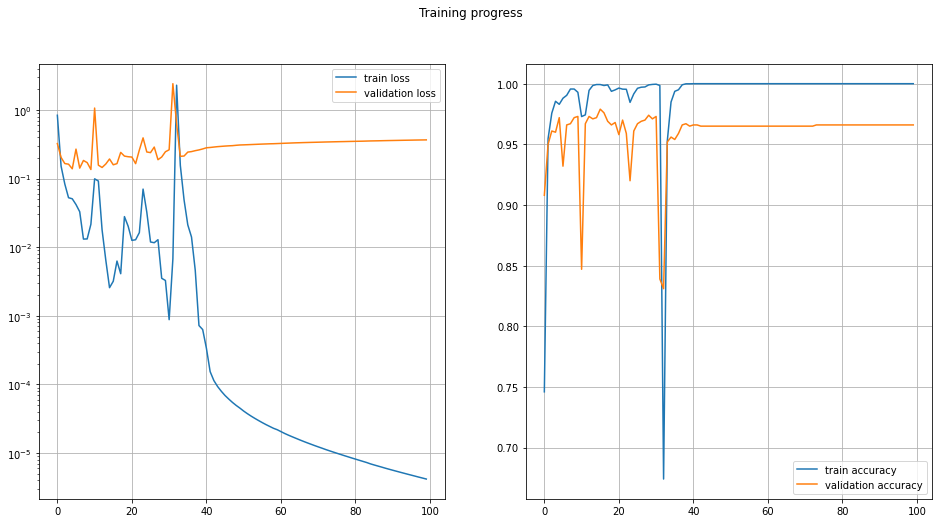

In [21]:
# plot training metrics
fig, ax =plt.subplots(1,2, figsize=(16,8))
ax[0].semilogy(hist.history['loss'], label='train loss')
ax[0].semilogy(hist.history['val_loss'], label='validation loss')
ax[1].plot(hist.history['accuracy'], label='train accuracy');
ax[1].plot(hist.history['val_accuracy'], label='validation accuracy');
ax[0].legend();
ax[1].legend();
ax[1].grid()
ax[0].grid()
fig.suptitle('Training progress')

print('Metrics on test set')
# display results with trained classifier (100 epochs)
Ypred4 = tf.argmax(clf_mnist(Xtest_), axis=-1)
print(classification_report(Ytest, Ypred4))
print(confusion_matrix(Ytest, Ypred4))


In [22]:
clf_mnist.evaluate(Xtest_, tf.one_hot(Ytest, depth=10), verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.2422 - accuracy: 0.9693


[0.2421618402004242, 0.9692999720573425]

In [27]:
# load best model from checkpoint
print('Best model found in epoch ', np.argmin(hist.history['val_loss'])+1)
clf2 = tf.keras.models.load_model('cpt/convnet_mnist')
Ypred5 = tf.argmax(clf2(Xtest_), axis=-1)
print(classification_report(Ytest, Ypred5))
print(confusion_matrix(Ytest, Ypred5))

Best model found in epoch  10
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       988
           1       0.98      0.99      0.99      1087
           2       0.98      0.98      0.98      1006
           3       0.98      0.97      0.97      1048
           4       0.99      0.98      0.98       998
           5       0.97      0.97      0.97       907
           6       0.98      0.97      0.98       993
           7       0.98      0.98      0.98      1081
           8       0.97      0.96      0.97       935
           9       0.96      0.97      0.96       957

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 975    1    1    0    0    3    1    0    4    3]
 [   1 1077    2    0    1    2    2    0    1    1]
 [   4    2  987    2    1    0    0    4    4    2]
 [   3    3    4 1020    0    9    0    2    3    4]